#Improving Computer Vision Accuracy using Convolutions

by Anish Anand

So far we have played with three layers to predict the mnist dataset, one imput layer,hidden layer and output layer and we have achieved the accuracy of about 97%. Now our job is to increase the accuracy using the Convolution network. Cpnvolution networks are of many type and it consists many parameters with default value None. Now we will work the mnist dataset and implement the Convolutions to improve the accuracy of the model.


Lets see the previous model at one glance first so we will relatively compare that what changes has been actualy made to the new model.

In [ ]:
import tensorflow as tf
fmnist=tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels)=fmnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

#define the  model
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2594 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1146 - accuracy: 0.9659
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0805 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0586 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0454 - accuracy: 0.9863

MODEL EVALUATION:
313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9741


#Using Convolution now 

So here we will redefine our model using Conv2d and try to understand the model and how it is increasing the accuracy of the model.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #for now just think values are put as randomly
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before,yes these layers will be same as above
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#lets know about the model 

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Hey Anish, bro have you notices that conv2d output is 26 , 26 , however the image were 28X28. So the reason is , it just leave the boundaries because it do not get sufficient neighbours for them to compare.



In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.1414 - accuracy: 0.9569
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0465 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0323 - accuracy: 0.9901
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0247 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0190 - accuracy: 0.9937

MODEL EVALUATION:
313/313 [==============================] - 3s 8ms/step - loss: 0.0305 - accuracy: 0.9895


WOWWWWWWWWWWWWWWW !
We can easily see that the accuracy jumped to 98% ad we can of course apply call back function to stop epoch once it reached 99%.

Look at the code again, and see, step by step how the convolutions were built. Instead of the input layer at the top, you added a Conv2D layer. The parameters are:

1.The number of convolutions you want to generate. The value here is purely arbitrary but it's good to use powers of 2 starting from 32.

2.The size of the Convolution. In this case, a 3x3 grid.

3.The activation function to use. In this case, you used a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0.

4.In the first layer, the shape of the input data.

#About the Maxpooling2d

You'll follow the convolution with a MaxPool2D layer which is designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one. Thus, it turns 4 pixels into 1. It repeats this across the image, and in doing so, it halves both the number of horizontal and vertical pixels, effectively reducing the image to 25% of the original image.


In [ ]:
#ok, lets try with 20 epochs , i know it will take time , but lets try na 

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=20)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0152 - accuracy: 0.9947
Epoch 2/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 3/20
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 4/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0090 - accuracy: 0.9968
Epoch 5/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 6/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0065 - accuracy: 0.9975
Epoch 7/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 8/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0064 - accuracy: 0.9978
Epoch 9/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0045 - accuracy: 0.9984
Epoch 10/20
1875/1875 [========================

I will tell you actually what is the disadvantage of that. Technically , this is called overfitting , in general knowledge we can say oversmart model, lol.
Yes it is , suppose you have only seen Red shoes all your life and when I will ask you what is the color of shoe referring my red shoe , you will definitely answer its Red shor. 

However , if I will ask about bLue shoe , you may confuse ,because all your life you have only seen red shoes.

So the technical issue overfitting raises here , the model works extremely well to the test data but it will confuse for the unseen data.

##Overfitting concept

But while the results might seem really good, the validation results may actually go down, due to something called overfitting. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

In [ ]:
################################################################################

# Visualising my model 

Visualising the Convolution and pooling 

In that we will actually see the transfer of images pixels while training and further detection.


Let's explore how to show the convolutions graphically. The cell below prints the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (i.e. 9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the dense layer is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [ ]:
print(test_labels[:100])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9]


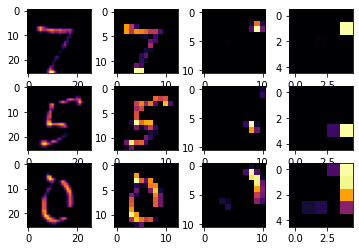

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

##EXERCISES

1.Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2.Remove the final Convolution. What impact will this have on accuracy or training time?

3.How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4.Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

5.In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.


Lets solve these ......................

#1 

In [ ]:
# reDefine the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)), #for now just think values are put as randomly
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'), #32 is replaced by 64
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before,yes these layers will be same as above
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compiling the new model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)




MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 89s 47ms/step - loss: 0.1194 - accuracy: 0.9631
Epoch 2/5
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 3/5
1875/1875 [==============================] - 85s 46ms/step - loss: 0.0267 - accuracy: 0.9918
Epoch 4/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0198 - accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0140 - accuracy: 0.9958

MODEL EVALUATION:
313/313 [==============================] - 4s 13ms/step - loss: 0.0274 - accuracy: 0.9914


32 is increased to 64 in both Conv2d layers

And what about the net accuracy , initially with 5 epochs and 32 Conv2d layers it was nearly 98.94% and now it is 99.14%. 




In [ ]:
# reDefine the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)), #for now just think values are put as randomly
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu'), #32 is replaced by 16
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before,yes these layers will be same as above
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compiling the new model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)




MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1746 - accuracy: 0.9476
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0574 - accuracy: 0.9820
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0396 - accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0235 - accuracy: 0.9924

MODEL EVALUATION:
313/313 [==============================] - 2s 7ms/step - loss: 0.0348 - accuracy: 0.9887


32 is decreased to 16 in both conv2d layers , lets see what happens next!
As we can see the accuracy is dropped to 98%.

So its pretty clear by decreasing the no. of neurons, the accuracy of the model drop.



#2 

Remove the final Convolution. What impact will this have on accuracy or training time?

In [ ]:
# reDefine the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #for now just think values are put as randomly
  tf.keras.layers.MaxPooling2D(2, 2),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
  # tf.keras.layers.MaxPooling2D(2,2),

# JUST REMOVING ONE OF CONV2D layer

  # Add the same layers as before,yes these layers will be same as above
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compiling the new model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)




MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4140 - accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0714 - accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0529 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0406 - accuracy: 0.9878
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0297 - accuracy: 0.9905

MODEL EVALUATION:
313/313 [==============================] - 2s 7ms/step - loss: 0.1073 - accuracy: 0.9747


Clearly , the accuracy is dropped. Because we removed the last layer which may make it less dense.

#3
How about adding more Convolutions? What impact do you think this will have? Experiment with it.

In [ ]:
# reDefine the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #for now just think values are put as randomly
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
  tf.keras.layers.MaxPooling2D(2,2),

# JUST REMOVING ONE OF CONV2D layer

  # Add the same layers as before,yes these layers will be same as above
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compiling the new model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)




MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3277 - accuracy: 0.9111
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0887 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0701 - accuracy: 0.9786
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0612 - accuracy: 0.9810

MODEL EVALUATION:
313/313 [==============================] - 3s 9ms/step - loss: 0.0723 - accuracy: 0.9808


Ok by adding more layers the accuracy go higher.

#4 and 5

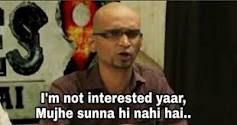